# Compound Charts

Altair provides a concise API for creating multi-panel and layered charts, and we'll mention three of them explicitly here:

- Layering
- Horizontal Concatenation
- Vertical Concatenation
- Repeat Charts

We'll explore those briefly here.

In [3]:
import altair as alt

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
# alt.renderers.enable('colab')

## Layering

Layering lets you put layer multiple marks on a single Chart. One common example is creating a plot with both points and lines representing the same data.

Let's use the ``stocks`` data for this example:

In [4]:
from vega_datasets import data
stocks = data.stocks()
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


Here is a simple line plot for the stocks data:

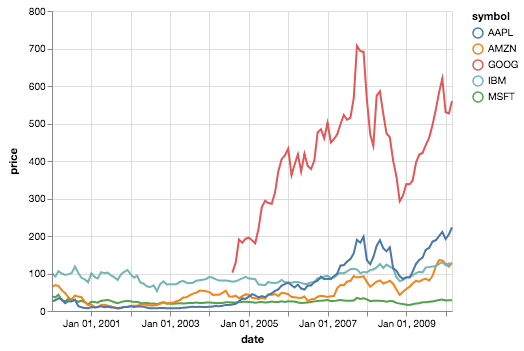

In [6]:
alt.Chart(stocks).mark_line().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

and here is the same plot with a ``circle`` mark:

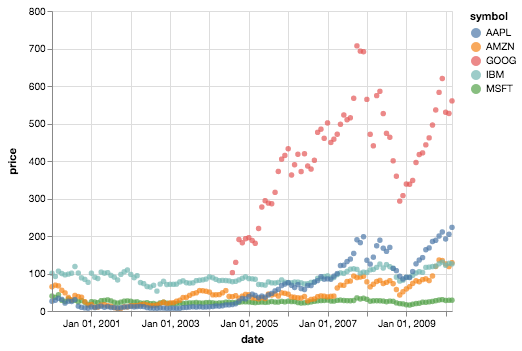

In [7]:
alt.Chart(stocks).mark_circle().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

We can layer these two plots together using a ``+`` operator:

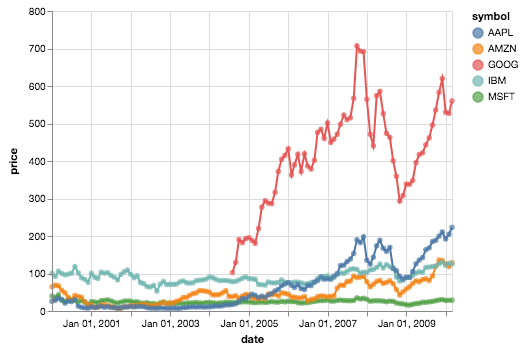

In [8]:
lines = alt.Chart(stocks).mark_line().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = alt.Chart(stocks).mark_circle().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

lines + points

This ``+`` is just a shortcut to the ``alt.layer()`` function, which does the same thing:

In [ ]:
alt.layer(lines, points)

One pattern we'll use often is to create a base chart with the common elements, and add together two copies with just a single change:

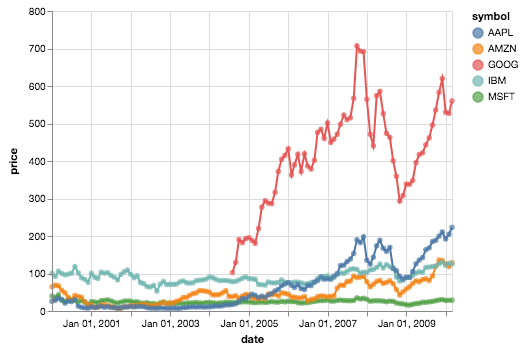

In [9]:
base = alt.Chart(stocks).encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

base.mark_line() + base.mark_circle()

## Horizontal Concatenation

Just as we can layer charts on top of each other, we can concatenate horizontally using ``alt.hconcat``, or equivalently the ``|`` operator:

In [ ]:
base.mark_line() | base.mark_circle()

In [ ]:
alt.hconcat(base.mark_line(),
            base.mark_circle())

This can be most useful for creating multi-panel views; for example, here is the iris dataset:

In [ ]:
iris = data.iris()
iris.head()

In [ ]:
base = alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species'
)

base | base.encode(x='sepalWidth')

## Vertical Concatenation

Vertical concatenation looks a lot like horizontal concatenation, but using either the ``alt.hconcat()`` function, or the ``&`` operator:

In [ ]:
base & base.encode(y='sepalWidth')

## Repeat Chart

Because it is such a common pattern to horizontally and vertically concatenate charts while changing one encoding, Altair offers a shortcut for this, using the ``repeat()`` operator.

In [ ]:
import altair as alt
from vega_datasets import data

iris = data.iris()

fields = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']

alt.Chart(iris).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species'
).properties(
    width=200,
    height=200
).repeat(
    row=fields,
    column=fields[::-1]
).interactive()

This repeat API is still not as streamlined as it could be, but we'll be working on that.